                                                                          #SVM vs Naive Bayes vs Decision Tree
                                                                                  #Shrijit Pendse
                                                                                  # (100799564)

In [190]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
#Loading the dataset
data =pd.read_csv("F:/Durham college/1200-Intro to data analytics/assignment 6/illnessstudy.csv")

In [193]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


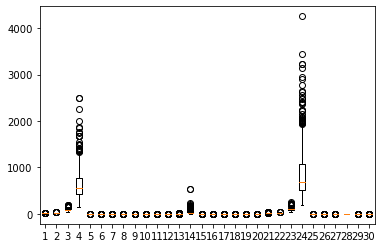

In [194]:
#Visualizing the outliers
plt.boxplot(data.drop("diagnosis",axis = 1))
plt.show()

In [195]:
#Removing the outliers
Q1 = data['area_worst'].quantile(0.25)
Q3 = data['area_worst'].quantile(0.75)

IQR1 = Q3 - Q1
filter = (data['area_worst'] >= Q1 - 1.5 * IQR) & (data['area_worst'] <= Q3 + 1.5 *IQR)
data_filt = data.loc[filter]
data_filt

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [196]:
# Exporting correlation matrix to excel for better visualization 
correlation = data.corr()
correlation.to_excel("correlation.xlsx")


In [197]:
#removving duplicates
data_filt = data_filt.drop_duplicates()

In [198]:
#Creating dependednt and independednt matrices.Dropping "perimeter_mean"&"perimeter_worst" since they have high correlation.
X = data_filt.drop(["diagnosis","perimeter_mean","perimeter_worst"],axis = 1).to_numpy()
y = data_filt["diagnosis"].to_numpy()

In [199]:
#Scaling the independednt variables
sc = StandardScaler()
X = sc.fit_transform(X)

In [200]:
#Splitting the data into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state = 666)

In [1]:
# Running the different models
for name,method in [("SVM",SVC(kernel = "rbf",random_state = 666)),
                   (("Gaussian NB"),GaussianNB()),
                     (("Bernoulli NB"),BernoulliNB()),
                   ("Decision Tree",DecisionTreeClassifier(max_depth = 10,random_state = 666))]:
    method.fit(X_train,y_train)
    predict = method.predict(X_test)
    names = ["Malignant","Benign"]
    print("\n Estimator : {}".format(name))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict,target_names = names))
    
    
    
    


NameError: name 'SVC' is not defined

In [211]:
#Combing the three models to build a vote  based classifier.
cl1 = SVC(kernel = "rbf",random_state = 666) 
cl2 = GaussianNB()
cl3 = DecisionTreeClassifier(max_depth = 5,random_state = 666)
VC = VotingClassifier(estimators = [("SVC",cl1),("GNB",cl2),("DT",cl3)],voting = "hard")


In [212]:
VC.fit(X_train,y_train)
predict = VC.predict(X_test)
names = ["Malignant","Benign"]
print("\n Estimator : Voting System")
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict,target_names = names))
    



 Estimator : Voting System
[[90  0]
 [ 1 43]]
              precision    recall  f1-score   support

   Malignant       0.99      1.00      0.99        90
      Benign       1.00      0.98      0.99        44

    accuracy                           0.99       134
   macro avg       0.99      0.99      0.99       134
weighted avg       0.99      0.99      0.99       134

